## Mini Project 3

### Import Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Titanic Dataset.csv", header=None)

### Split Single Column into Multiple Columns

In [6]:
df = df[0].str.split(",", expand=True)

# Set the first row as the header
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)

df.columns = df.columns.str.strip().str.lower()

print(df.head())


0 survived pclass     sex   age sibsp parch     fare embarked  class    who  \
0        0      3    male  22.0     1     0     7.25        S  Third    man   
1        1      1  female  38.0     1     0  71.2833        C  First  woman   
2        1      3  female  26.0     0     0    7.925        S  Third  woman   
3        1      1  female  35.0     1     0     53.1        S  First  woman   
4        0      3    male  35.0     0     0     8.05        S  Third    man   

0 adult_male deck  embark_town alive  alone  
0       True       Southampton    no  False  
1      False    C    Cherbourg   yes  False  
2      False       Southampton   yes   True  
3      False    C  Southampton   yes  False  
4       True       Southampton    no   True  


#### Question 1
##### What is the survival rate of passengers?

In [7]:
survival_rate = df['survived'].value_counts(normalize=True) * 100
print(survival_rate)

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


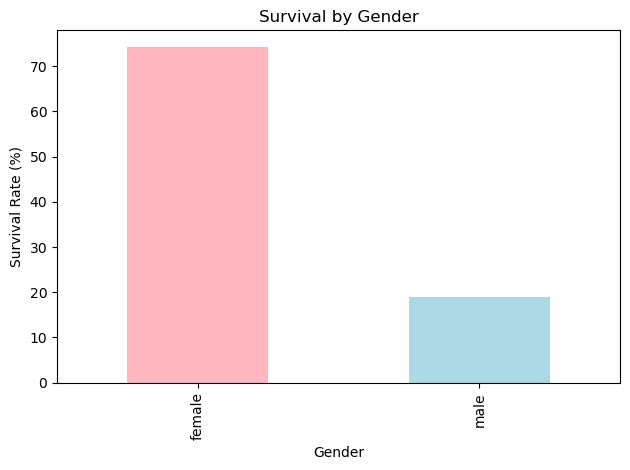

In [19]:
# Group by gender and calculate survival rate
survival_by_gender = df.groupby('sex')['survived'].mean() * 100

# Plot the result
survival_by_gender.plot(kind='bar', title='Survival by Gender', color=['lightpink', 'lightblue'])
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


#### Question 2
##### What is the Gender Distribution of Passengers

In [8]:
gender_distribution = df['sex'].value_counts()
print(gender_distribution)

sex
male      577
female    314
Name: count, dtype: int64


#### How does Survival Rate Differ by Class

#### Question 3
##### How does survival rate differ by class?

In [9]:
numeric_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

print(df.head())

0  survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

0    who adult_male deck  embark_town alive  alone  
0    man       True       Southampton    no  False  
1  woman      False    C    Cherbourg   yes  False  
2  woman      False       Southampton   yes   True  
3  woman      False    C  Southampton   yes  False  
4    man       True       Southampton    no   True  


In [10]:
survival_by_class = df.groupby('pclass')['survived'].mean() * 100
print("\nSurvival Rate by Class (%):\n", survival_by_class)


Survival Rate by Class (%):
 pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


#### Question 4
##### What is the distribution of passenger ages?

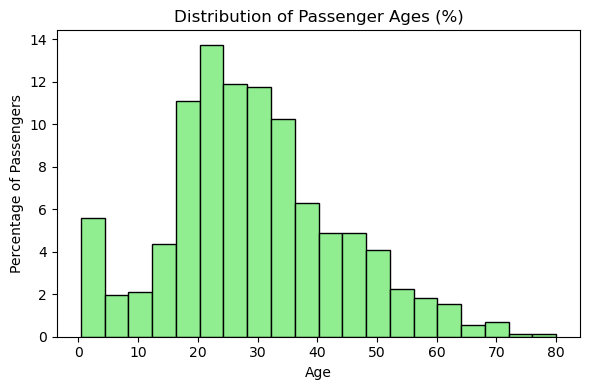

In [11]:
ages = df['age'].dropna().astype(float)

# Plot histogram as percentage
plt.figure(figsize=(6, 4))
counts, bins, patches = plt.hist(ages, bins=20, color='lightgreen', edgecolor='black', weights=[100 / len(ages)] * len(ages))

plt.title("Distribution of Passenger Ages (%)")
plt.xlabel("Age")
plt.ylabel("Percentage of Passengers")
plt.tight_layout()
plt.show()

#### Question 5
How many passengers embarked from each location?

In [12]:
embarked_counts = df['embarked'].value_counts()
print("Counts by Embarkation Point:\n", embarked_counts)
print("\nTotal Embarked Passengers:", embarked_counts.sum())

Counts by Embarkation Point:
 embarked
S    644
C    168
Q     77
       2
Name: count, dtype: int64

Total Embarked Passengers: 891


#### Question 6
##### What is the average fare paid per class?

In [31]:
avg_fare_per_class = df.groupby('pclass')['fare'].mean()
print(avg_fare_per_class)

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


#### Question 7
##### How does gender affect survival rates?

In [32]:
gender_survival_rate = df.groupby('sex')['survived'].mean() * 100
print(gender_survival_rate)

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


#### Question 8
##### What is the correlation between fare and survival?

In [37]:
fare_survival_corr = df[['fare', 'survived']].corr().loc['fare', 'survived']
print(fare_survival_corr)

0.2573065223849626


#### Question 9
#####  How does the number of siblings/spouses aboard affect survival?

In [36]:
sibsp_survival_rate = df.groupby('sibsp')['survived'].mean() * 100
print(sibsp_survival_rate)

sibsp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: survived, dtype: float64


#### Question 10
##### What is the age distribution by class?

In [13]:
age_by_class = df.groupby('pclass')['age'].mean()
print(age_by_class)

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64


#### Question 11
##### What is the survival rate by embarkation point?

In [14]:
survival_by_embark = df.groupby('embarked')['survived'].mean() * 100
print(survival_by_embark)

embarked
     100.000000
C     55.357143
Q     38.961039
S     33.695652
Name: survived, dtype: float64


#### Question 12
##### What is the impact of having parents/children aboard on survival?

In [35]:
parch_survival_rate = df.groupby('parch')['survived'].mean() * 100
print(parch_survival_rate)

parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: survived, dtype: float64


#### Project Summary


###### This project explores the famous Titanic passenger dataset, focusing on uncovering patterns related to survival, passenger demographics, and boarding details using Python libraries like Pandas, and Matplotlib.

##### Key Tasks and Insights:
###### 1. Data Preparation:
	Loaded a CSV file where data was initially stored in a single comma-separated column.
	Split the column into multiple columns for structured analysis.
	Cleaned and converted appropriate data types (e.g., `age`, `fare` as float).
###### 2. Survival Analysis:
	Calculated overall survival rate.
	Compared survival rates by passenger class (`pclass`), gender, and embarkation point.
###### 3. Data Visualization:
	Created a histogram of passenger ages, labelling each bar with percentage values.
	Used bar plots to show embarkation counts and total numbers.
	Emphasized percentage distribution for better interpretability.
###### 4. Error Handling and Debugging:
	Resolved errors due to incorrect column names and data types.
	Handled `Key Error` and `Type Error` from misformatted data during analysis.
###### 5. Embarkation Analysis:
	Counted passengers by embarkation points (`S`, `C`, `Q`).
	Summarized total number of passengers who boarded the ship.
###### Outcome:
The project provided insights into who survived the Titanic disaster and highlighted how factors like class, age, sex, and embarkation point influenced survival. It also demonstrated data cleaning, transformation, visualization, and summary reporting techniques key skills in data analysis.

###### Conclusion
Survival:      	Higher in 1st class, women, and children.
Age:	         	Most passengers were young adults.
Embarkation:  	Majority of passengers boarded at Southampton.
Gender Gap:   Clear disparity in survival based on gender (women favored).
Class Divide: 	Wealth/class directly influenced survival odds.
